In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from itertools import cycle


def roc_plot(y_test, y_pred):
    rice = {
        0: 'Cammeo',
        1: 'Osmanscik',
    }

    plt.figure(figsize=(8, 4))

    colors = cycle(['red', 'blue'])

    for i, class_name in rice.items():
        class_y_test = [1 if label == i else 0 for label in y_test]
        class_y_pred = [pred[i] for pred in y_pred]

        fpr, tpr, _ = roc_curve(class_y_test, class_y_pred)
        roc_auc = auc(fpr, tpr)

        color = next(colors)

        plt.subplot(1, len(rice), i + 1)
        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlim([-.05, 1.05])
        plt.ylim([.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {class_name}')
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


def cm_plot(conf_matrix):
    rice = ['Cammeo', 'Osmanscik']

    plt.figure(figsize=(8, 4))
    sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=rice, yticklabels=rice)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [37]:
import numpy as np
import pandas as pd

cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
        'Eccentricity', 'Convex_Area', 'Extent', 'Class']

data = pd.read_csv('./data/Rice_Cammeo_Osmancik.arff', names=cols)
data['Class'] = (data['Class'] == 'Osmancik').astype(int)

In [38]:
# fig, ax = plt.subplots(figsize=(8,  4))

# z_scores = np.abs((data.select_dtypes(include=[np.number]) - data.select_dtypes(
#     include=[np.number]).mean()) / data.select_dtypes(include=[np.number]).std())
# outliers = z_scores > 3

# for i, col in enumerate(z_scores.columns):
#     # Blue Z-Score
#     ax.scatter([col]*len(z_scores), z_scores[col],
#                c='b', label='Normal' if i == 0 else "")

#     # Red Z-Score
#     outlier_z_scores = z_scores.loc[outliers[col], col]

#     ax.scatter([col]*len(outlier_z_scores), outlier_z_scores,
#                c='r', label='Outlier' if i == 0 else "")

# ax.set_title('Z-Scores of Features with Outliers')
# ax.set_xlabel('Feature')
# ax.set_ylabel('Z-Score')
# ax.legend()
# plt.xticks(rotation=45)

In [39]:
from sklearn.preprocessing import StandardScaler

x = data.iloc[:, 0:7].values
y = data.iloc[:, -1]

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.3, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                                  min_samples_leaf=10, n_estimators=50, oob_score=True, verbose=0)

# Run k-fold cross-validation (let's choose k=10)
cv_scores = cross_val_score(rf_model, x, y, cv=10, scoring='accuracy')

# Print cross-validation scores for each fold
print("Cross-validation scores for each fold: ", cv_scores)

# Print the average cross-validation score
print("Average cross-validation score: ", np.mean(cv_scores))

rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)
y_prob = rf_model.predict_proba(x_test)

Cross-validation scores for each fold:  [0.93175853 0.95013123 0.95013123 0.93963255 0.93963255 0.91863517
 0.93175853 0.93700787 0.88188976 0.88976378]
Average cross-validation score:  0.9270341207349082


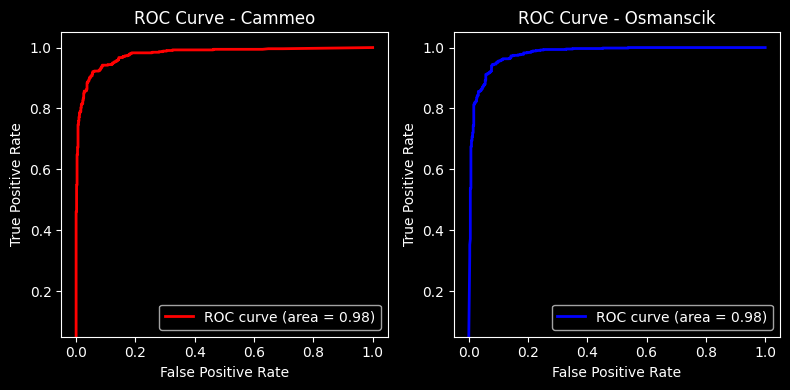

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       518
           1       0.92      0.95      0.94       625

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

[[470  48]
 [ 34 591]]


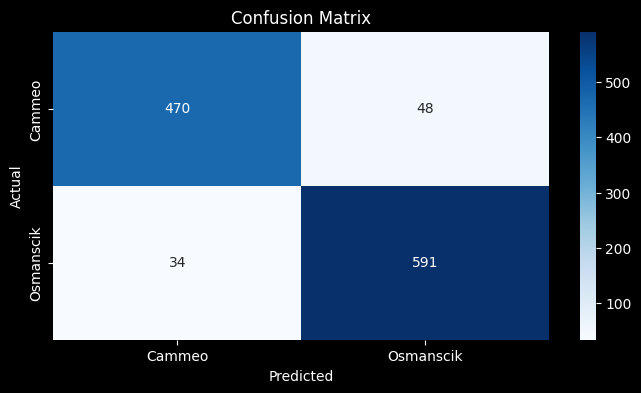

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

roc_plot(y_test, y_prob)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm_plot(confusion_matrix(y_test, y_pred))